In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
from google.colab import drive

In [9]:
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA/fake_reg.csv')

In [11]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


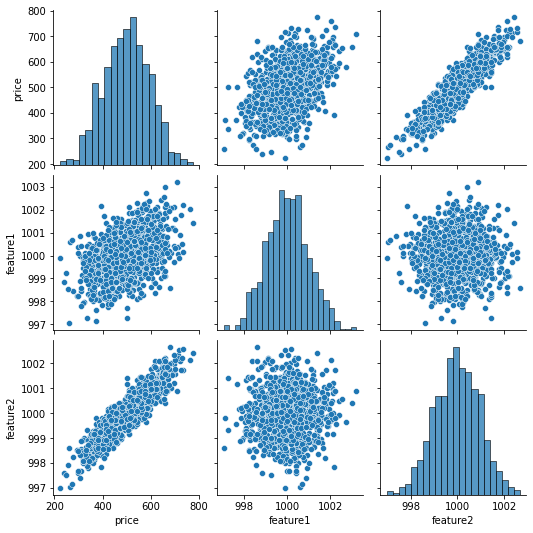

In [12]:
sns.pairplot(df)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df[['feature1', 'feature2']].values
y = df['price'].values

In [15]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
X_train.shape

(700, 2)

In [18]:
X_test.shape

(300, 2)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

In [21]:
scaler = MinMaxScaler()

In [22]:
scaler.fit(X_train)

MinMaxScaler()

In [23]:
X_train = scaler.transform(X_train)

In [24]:
X_test = scaler.transform(X_test)

In [25]:
X_train.max()

1.0

In [26]:
X_train.min()

0.0

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [28]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Sequentia

In [29]:
help(Dense)

Help on class Dense in module keras.layers.core.dense:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along axis 2 of the `input`, on every

In [30]:
model = Sequential([Dense(4, activation='relu'),
                    Dense(2, activation='relu'),
                    Dense(1)])

In [31]:
# same as upper box
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

In [32]:
model.fit(x=X_train, y=y_train, epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 256678.7812
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256628.0938
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256576.5469
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256519.9375
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 256457.6250
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 256388.4844
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 256310.7188
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 256221.5938
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 256122.4688
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 256012.3906
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 255890.4531
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

In [33]:
loss_df = pd.DataFrame(model.history.history)

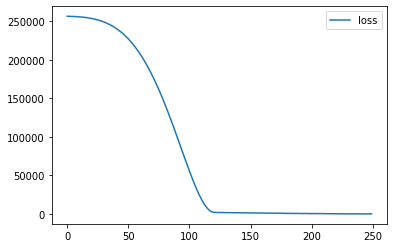

In [34]:
loss_df.plot()

In [35]:
model.evaluate(X_test, y_test, verbose=0)

49.988197326660156

In [36]:
model.evaluate(X_train, y_train, verbose=0)

50.92120361328125

In [37]:
test_predictions = model.predict(X_test)

In [38]:
test_predictions

array([[410.9945 ],
       [617.3441 ],
       [587.4062 ],
       [569.38257],
       [375.48987],
       [575.56067],
       [515.80273],
       [461.4621 ],
       [547.63556],
       [450.42218],
       [606.2051 ],
       [545.76764],
       [424.13208],
       [414.627  ],
       [642.4319 ],
       [440.96054],
       [507.6555 ],
       [652.6577 ],
       [654.6479 ],
       [562.08295],
       [344.3516 ],
       [448.44818],
       [389.87393],
       [385.85944],
       [563.5793 ],
       [605.6581 ],
       [531.3229 ],
       [432.23477],
       [648.1368 ],
       [418.892  ],
       [445.8968 ],
       [486.47577],
       [442.23398],
       [672.9548 ],
       [428.7098 ],
       [423.16336],
       [501.23126],
       [548.17694],
       [510.56036],
       [402.61038],
       [612.433  ],
       [421.40604],
       [599.10144],
       [448.6973 ],
       [502.4416 ],
       [576.6483 ],
       [659.4761 ],
       [491.05457],
       [328.5315 ],
       [486.864  ],


In [39]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [40]:
test_predictions

0      410.994507
1      617.344116
2      587.406189
3      569.382568
4      375.489868
          ...    
295    528.474792
296    516.766174
297    604.093262
298    421.525604
299    416.681854
Length: 300, dtype: float32

In [44]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [45]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [48]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [49]:
pred_df

,Test True Y,Model Predictions
0,402.296319,410.994507
1,624.156198,617.344116
2,582.455066,587.406189
3,578.588606,569.382568
4,371.224104,375.489868
...,...,...
295,525.704657,528.474792
296,502.909473,516.766174
297,612.727910,604.093262
298,417.569725,421.525604


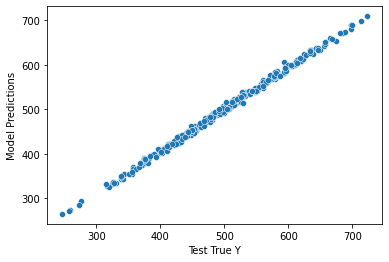

In [50]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [52]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

5.805996532327597

In [53]:
df

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851


In [54]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [57]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions']) ** 0.5

7.070233626740465

In [58]:
new_gem = [[998, 1000]]

In [59]:
new_gem = scaler.transform(new_gem)

In [60]:
model.predict(new_gem)

array([[425.59134]], dtype=float32)

In [62]:
from tensorflow.keras.models import load_model

In [63]:
model.save('my_gem_model.h5')

In [64]:
later_model = load_model('my_gem_model.h5')

In [65]:
later_model.predict(new_gem)

array([[425.59134]], dtype=float32)